# EDA

### Подготовка к работе

In [2]:
! pip install matplotlib seaborn pandas 

  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.

In [6]:
import json
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

### Чтение данных

In [4]:
with open('seq_fpbase.json', 'r') as file:
    json_data = json.load(file)

### Параметры 

In [7]:
matplotlib.rcParams['font.family'] = 'Arial'
SMALL_SIZE = 10
MEDIUM_SIZE = 12
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE, labelsize=SMALL_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=MEDIUM_SIZE)

sns.set_theme(style="whitegrid")

plt.style.use('default')

main_color = '#102655'

### Длины аминокислотных последовательностей

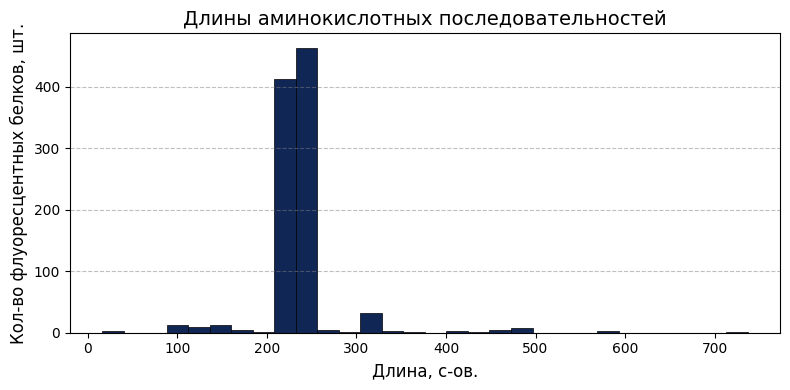

In [21]:
seq_lengths = [len(item['seq']) for item in json_data if item.get('seq')]

plt.figure(figsize=(8, 4))
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=0)
plt.hist(seq_lengths, bins=30, color=main_color, edgecolor='black', linewidth=0.5, zorder=1)

plt.title('Длины аминокислотных последовательностей', fontsize=14)
plt.xlabel('Длина, с-ов.', fontsize=12)
plt.ylabel('Кол-во флуоресцентных белков, шт.', fontsize=12)

plt.tight_layout()
plt.show()

### Максимум длины волны испускания

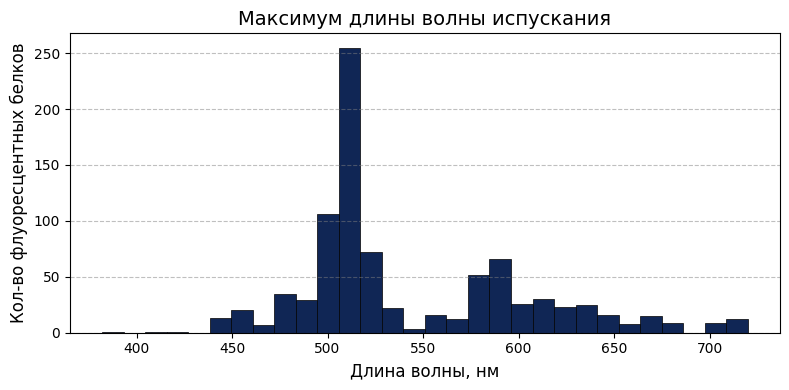

In [ ]:
em_max = []
for item in json_data:
    for state in item.get('states', []):
        if state.get('em_max') is not None and state.get('em_max') < 800:
            em_max.append(state['em_max'])
if em_max:
    plt.figure(figsize=(8, 4))
    plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=0)
    plt.hist(em_max, bins=30, color=main_color, edgecolor='black', linewidth=0.5, zorder=1)
    plt.title('Максимум длины волны испускания', fontsize=14)
    plt.xlabel('Длина волны, нм', fontsize=12)
    plt.ylabel('ККол-во флуоресцентных белков, шт.', fontsize=12)
    plt.tight_layout()
    plt.show()


### Максимум длины волны поглощения

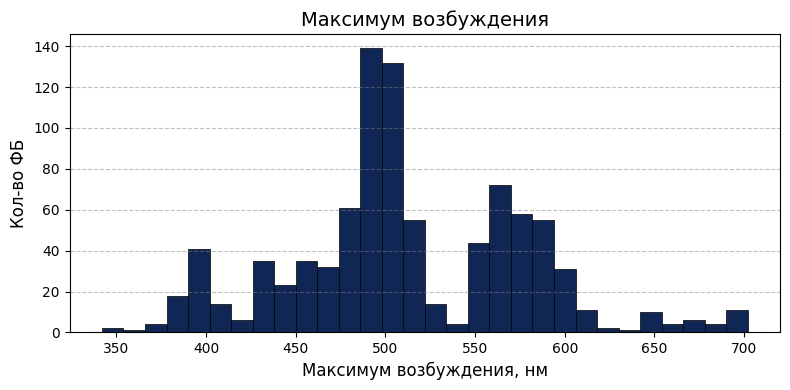

In [ ]:
ex_max = []
for item in json_data:
    for state in item.get('states', []):
        if state.get('ex_max') is not None:
            ex_max.append(state['ex_max'])
if ex_max:
    plt.figure(figsize=(8, 4))
    plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=0)
    plt.hist(ex_max, bins=30, color=main_color, edgecolor='black', linewidth=0.5, zorder=1)
    plt.title('Максимум длины волны поглощения', fontsize=14)
    plt.xlabel('Длина волны, нм', fontsize=12)
    plt.ylabel('Кол-во флуоресцентных белков, шт.', fontsize=12)
    plt.tight_layout()
    plt.show()

### Коэффициент экстинкции

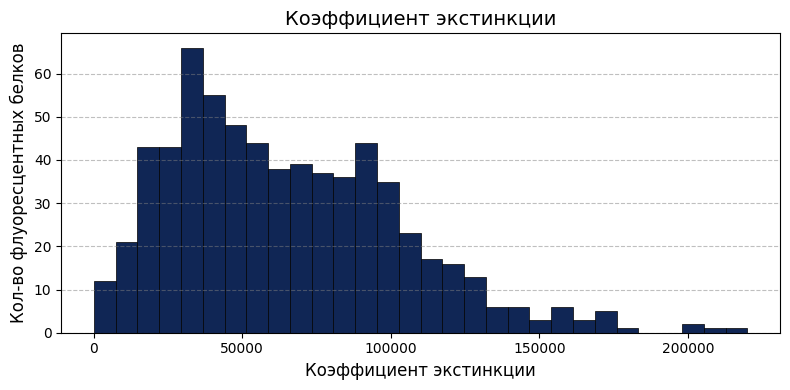

In [ ]:
ext_coeff = []
for item in json_data:
    for state in item.get('states', []):
        if state.get('ext_coeff') is not None:
            ext_coeff.append(state['ext_coeff'])
if ext_coeff:
    plt.figure(figsize=(8, 4))
    plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=0)
    plt.hist(ext_coeff, bins=30, color=main_color, edgecolor='black', linewidth=0.5, zorder=1)
    plt.title('Коэффициент экстинкции', fontsize=14)
    #plt.xlabel('Коэффициент экстинкции', fontsize=12)
    plt.ylabel('Кол-во флуоресцентных белков, шт.', fontsize=12)
    plt.tight_layout()
    plt.show()

### Корелляция длин волн

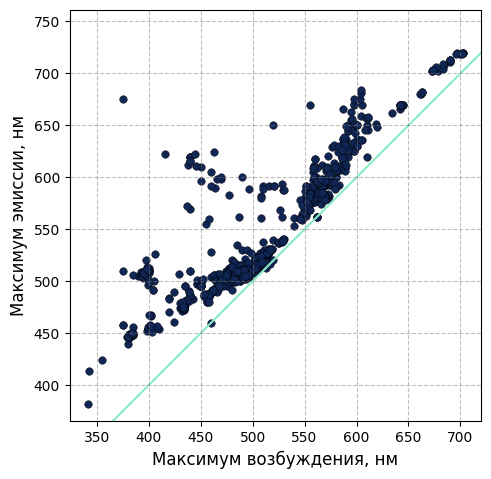

In [ ]:
ex_max_scatter = []
em_max_scatter = []
for item in json_data:
    for state in item.get('states', []):
        if state.get('ex_max') is not None and state.get('em_max') is not None:
            if state['em_max'] != 1000:
                ex_max_scatter.append(state['ex_max'])
                em_max_scatter.append(state['em_max'])
if ex_max_scatter and em_max_scatter:
    plt.figure(figsize=(5, 5))
    plt.grid(linestyle='--', color='gray', alpha=0.5, zorder=0)
    plt.scatter(ex_max_scatter, em_max_scatter, color=main_color, edgecolor='black', marker='o', s=30, linewidths=0.3, zorder=1)
    plt.xlabel('Длина волны возбуждения, нм', fontsize=12)
    plt.ylabel('Длина волны испускания, нм', fontsize=12)
    plt.axis('square')
    x = [350, 400, 450, 500, 550, 600, 650, 700, 750]
    y = [350, 400, 450, 500, 550, 600, 650, 700, 750]
    plt.plot(x, y, color=(140/255, 235/255, 199/255), zorder=1)
    plt.tight_layout()
    plt.show()

### Switch type

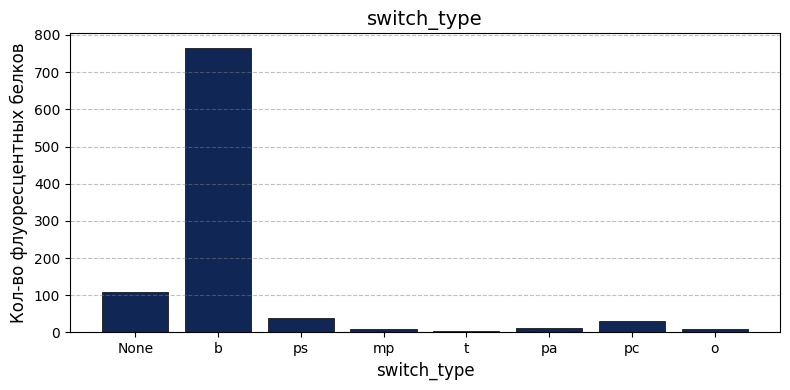

In [ ]:
switch_types = [item.get('switch_type', 'None') if item.get('switch_type') else 'None' for item in json_data]
if switch_types:
    import collections
    counter = collections.Counter(switch_types)
    plt.figure(figsize=(8, 4))
    plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=0)
    plt.bar(list(counter.keys()), list(counter.values()), color=main_color, edgecolor='black', linewidth=0.5, zorder=1)
    plt.title('switch_type', fontsize=14)
    plt.xlabel('switch_type', fontsize=12)
    plt.ylabel('Кол-во флуоресцентных белков, шт.', fontsize=12)
    plt.tight_layout()
    plt.show()

### Стоксовский сдвиг

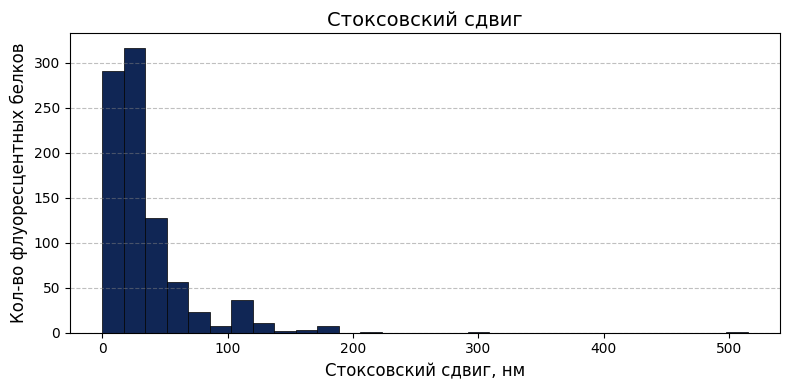

In [ ]:
stokes_shifts = []
for item in json_data:
    for state in item.get('states', []):
        ex = state.get('ex_max')
        em = state.get('em_max')
        if ex is not None and em is not None:
            stokes_shifts.append(em - ex)
if stokes_shifts:
    plt.figure(figsize=(8, 4))
    plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=0)
    plt.hist(stokes_shifts, bins=30, color=main_color, edgecolor='black', linewidth=0.5, zorder=1)
    plt.title('Стоксовский сдвиг', fontsize=14)
    plt.xlabel('Стоксовский сдвиг, нм', fontsize=12)
    plt.ylabel('Кол-во флуоресцентных белков, шт.', fontsize=12)
    plt.tight_layout()
    plt.show()